In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset("iris")

df

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


> The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
for col in df.columns: 
    print(f'Missing values in {col} : {df[col].isnull().sum()}')

Missing values in sepal_length : 0
Missing values in sepal_width : 0
Missing values in petal_length : 0
Missing values in petal_width : 0
Missing values in species : 0


In [5]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
df['type'] = LabelEncoder().fit_transform(df['species'])
df.set_index('species')

,sepal_length,sepal_width,petal_length,petal_width,type
species,,,,,
setosa,5.1,3.5,1.4,0.2,0
setosa,4.9,3.0,1.4,0.2,0
setosa,4.7,3.2,1.3,0.2,0
setosa,4.6,3.1,1.5,0.2,0
setosa,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
virginica,6.7,3.0,5.2,2.3,2
virginica,6.3,2.5,5.0,1.9,2
virginica,6.5,3.0,5.2,2.0,2


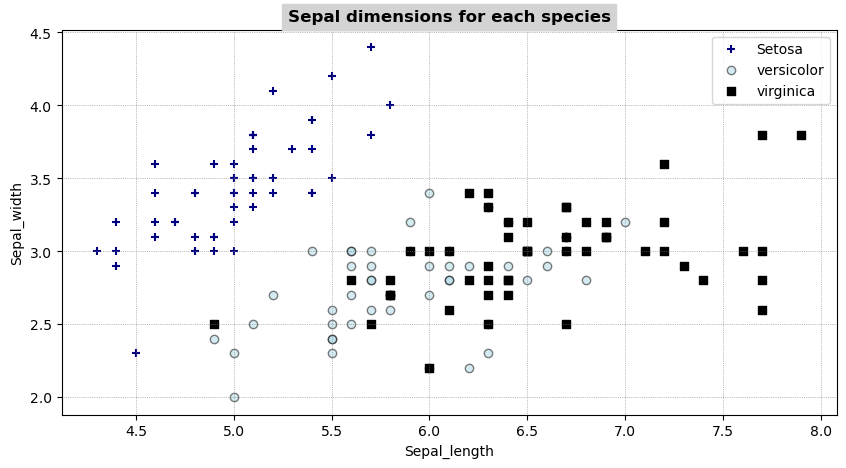

In [7]:
plt.figure(figsize=(10,5), edgecolor='black')
plt.style.use('default')

plt.scatter(df[df['species']=='setosa'].sepal_length, df[df['species']=='setosa'].sepal_width, marker='+', color='navy', edgecolor='black', label='Setosa')
plt.scatter(df[df['species']=='versicolor'].sepal_length, df[df['species']=='versicolor'].sepal_width, marker='o', color='lightblue', edgecolor='black', alpha=0.5, label='versicolor')
plt.scatter(df[df['species']=='virginica'].sepal_length, df[df['species']=='virginica'].sepal_width, marker='s', color='black', edgecolor='black', label='virginica')

plt.title('Sepal dimensions for each species', fontsize=12, fontweight='bold', backgroundcolor='lightgray')
plt.xlabel('Sepal_length', fontsize=10)
plt.ylabel('Sepal_width', fontsize=10)

plt.grid(linestyle='dotted', lw=.5, color='gray')
plt.legend()

## KNeighbors Classifier

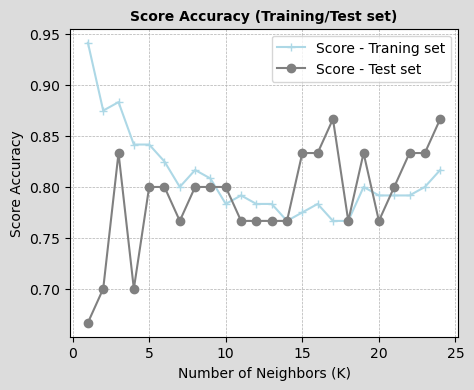

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

X = df[['sepal_length','sepal_width']]
y= df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

plt.figure(figsize=(5,4), facecolor='gainsboro')
training_accuracy_knn = []
test_accuracy_knn = []

for i in np.arange(1,25,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn.predict(X_test)
    training_accuracy_knn.append(knn.score(X_train, y_train))
    test_accuracy_knn.append(knn.score(X_test, y_test))
    
plt.plot(np.arange(1,25,1), training_accuracy_knn, color='lightblue', label='Score - Traning set', marker='+')
plt.plot(np.arange(1,25,1), test_accuracy_knn, color='grey', label='Score - Test set', marker='o')
plt.xlabel('Number of Neighbors (K)', fontsize=10)
plt.ylabel('Score Accuracy', fontsize=10)
plt.title('Score Accuracy (Training/Test set)', fontsize=10, fontweight='bold')
plt.grid(lw=0.5, linestyle='dashed')
plt.legend()

In [9]:
from sklearn.model_selection import GridSearchCV
k=np.arange(1,26,1)
parameters = {'n_neighbors':k}
knn = KNeighborsClassifier(n_neighbors=k)
searcher = GridSearchCV(knn, param_grid=parameters, cv=5)
searcher.fit(X_train,y_train)
searcher.best_params_

{'n_neighbors': 18}

In [10]:
clf_knn = KNeighborsClassifier(n_neighbors=18)
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)

print('Score - Training set:', '{:.2%}'.format(clf_knn.score(X_train,y_train)))
print('Score - Test set:', '{:.2%}'.format(clf_knn.score(X_test,y_test)))

print('Error rate:', str(np.sum(y_test != clf_knn.predict(X_test))))

Score - Training set: 76.67%
Score - Test set: 76.67%
Error rate: 7


In [11]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

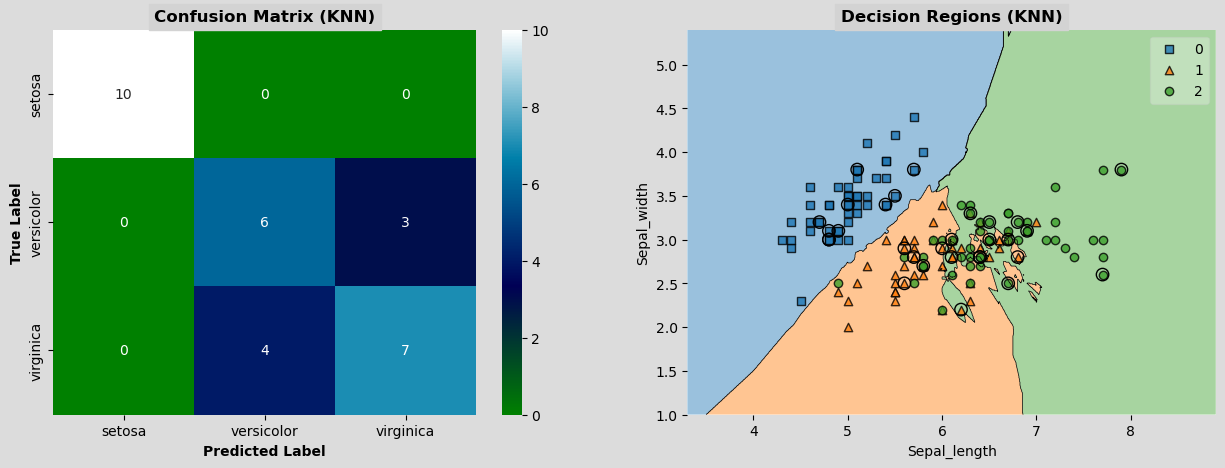

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5), facecolor='gainsboro')
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='ocean', ax=ax1
           )
ax1.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax1.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax1.set_ylabel('True Label', fontsize=10, fontweight='bold')
ax1.set_xlabel('Predicted Label', fontsize=10, fontweight='bold')
ax1.set_title('Confusion Matrix (KNN)', fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=clf_knn, 
                      ax=ax2, 
                      X_highlight=X_test.to_numpy(),
                      markers='s^oxv')
ax2.set_xlabel('Sepal_length', fontsize=10)
ax2.set_ylabel('Sepal_width', fontsize=10)
ax2.set_title('Decision Regions (KNN)', fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plt.show()

## Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X = df[['sepal_length','sepal_width']]
y= df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

parameters = {'penalty':['l1','l2','elasticnet'], 'C': [0.001,0.01,0.1,1,10,100], 'solver':['lbfgs', 'liblinear', 'newton-cg']}
lr = LogisticRegression(penalty='penalty', C='C', solver='solver')
searcher = GridSearchCV(estimator=lr, param_grid=parameters, cv=5)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C='C', penalty='penalty',
                                          solver='solver'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']})

In [14]:
print('Best parameters', str(searcher.best_params_))
print('Best estimators', str(searcher.best_estimator_))
print('Best estimators', '{:.2%}'.format(searcher.best_score_))

Best parameters {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best estimators LogisticRegression(C=0.1)
Best estimators 78.33%


In [15]:
clf_lr = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs')
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
print('Error rate:', str(np.sum(y_test != clf_lr.predict(X_test))))

Error rate: 3


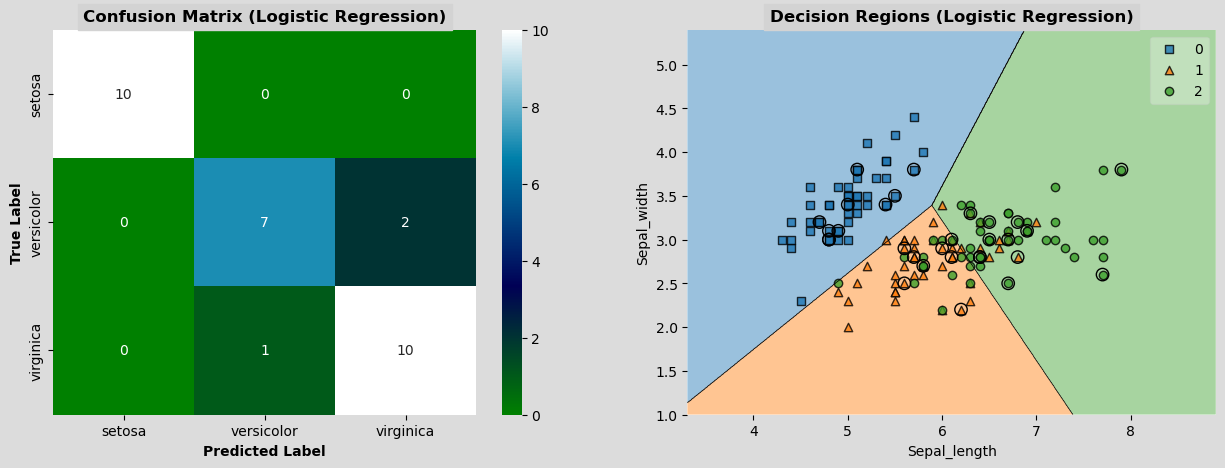

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5), facecolor='gainsboro')
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='ocean', ax=ax1
           )
ax1.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax1.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax1.set_ylabel('True Label', fontsize=10, fontweight='bold')
ax1.set_xlabel('Predicted Label', fontsize=10, fontweight='bold')
ax1.set_title('Confusion Matrix (Logistic Regression)', fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=clf_lr, 
                      ax=ax2, 
                      X_highlight=X_test.to_numpy(),
                      markers='s^oxv')
ax2.set_xlabel('Sepal_length', fontsize=10)
ax2.set_ylabel('Sepal_width', fontsize=10)
ax2.set_title('Decision Regions (Logistic Regression)', fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plt.show()

## Support Vector Machines (SVM)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X = df[['sepal_length','sepal_width']]
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

parameters = {'C':[0.001,0.01,0.1,1,10,100], 'kernel':['rbf','linear', 'poly', 'sigmoid'], 'gamma': ['scale','auto']}
svm = SVC(C='C', kernel='kernel', gamma='gamma')
searcher = GridSearchCV(estimator=svm, param_grid=parameters, cv=5)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C='C', gamma='gamma', kernel='kernel'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [18]:
print('Best parameters', str(searcher.best_params_))
print('Best estimators', str(searcher.best_estimator_))
print('Best estimators', '{:.2%}'.format(searcher.best_score_))

Best parameters {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best estimators SVC(C=1, kernel='linear')
Best estimators 78.33%


In [19]:
clf_svm = SVC(C=1, gamma='scale', kernel='linear')
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print('Error rate:', str(np.sum(y_test != clf_svm.predict(X_test))))

Error rate: 3


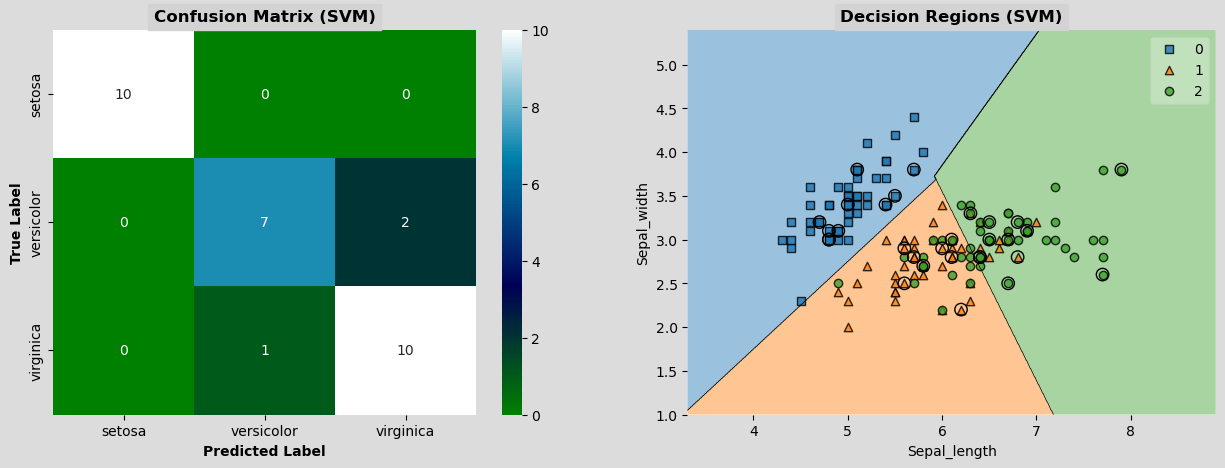

In [20]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5), facecolor='gainsboro')
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='ocean', ax=ax1
           )
ax1.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax1.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax1.set_ylabel('True Label', fontsize=10, fontweight='bold')
ax1.set_xlabel('Predicted Label', fontsize=10, fontweight='bold')
ax1.set_title('Confusion Matrix (SVM)', fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=clf_svm, 
                      ax=ax2, 
                      X_highlight=X_test.to_numpy(),
                      markers='s^oxv')
ax2.set_xlabel('Sepal_length', fontsize=10)
ax2.set_ylabel('Sepal_width', fontsize=10)
ax2.set_title('Decision Regions (SVM)', fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plt.show()

## Decision Tree

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

X = df[['sepal_length','sepal_width']]
y = df.type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

dt = DecisionTreeClassifier()
parameters = {'max_depth': np.arange(1,10),
                    'criterion':["gini", "entropy", "log_loss"],
                             'min_samples_leaf':np.arange(1,21,1)}
searcher = GridSearchCV(estimator=dt, param_grid=parameters, cv=5)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [22]:
print('Best parameters', str(searcher.best_params_))
print('Best estimators', str(searcher.best_estimator_))
print('Best estimators', '{:.2%}'.format(searcher.best_score_))

Best parameters {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1}
Best estimators DecisionTreeClassifier(criterion='entropy', max_depth=4)
Best estimators 75.00%


In [23]:
clf_dt = DecisionTreeClassifier(max_depth=4, criterion='log_loss', min_samples_leaf=1)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
print('Error rate:', str(np.sum(y_test != clf_dt.predict(X_test))))

Error rate: 8


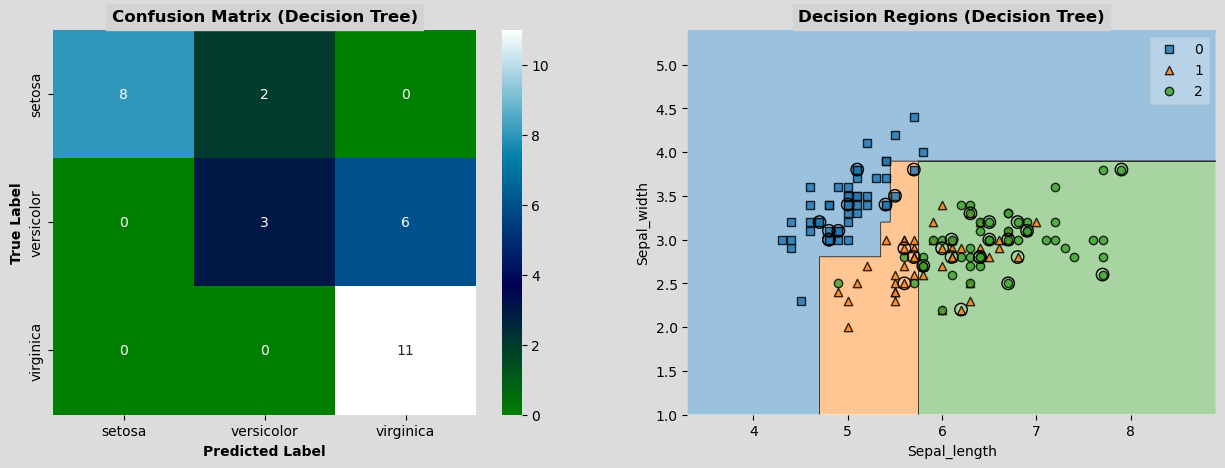

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5), facecolor='gainsboro')
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='ocean', ax=ax1
           )
ax1.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax1.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax1.set_ylabel('True Label', fontsize=10, fontweight='bold')
ax1.set_xlabel('Predicted Label', fontsize=10, fontweight='bold')
ax1.set_title('Confusion Matrix (Decision Tree)', fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=clf_dt, 
                      ax=ax2, 
                      X_highlight=X_test.to_numpy(),
                      markers='s^oxv')
ax2.set_xlabel('Sepal_length', fontsize=10)
ax2.set_ylabel('Sepal_width', fontsize=10)
ax2.set_title('Decision Regions (Decision Tree)', fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plt.show()

## Bagging Classifier

In [25]:
from sklearn.metrics import accuracy_score


clf_bg = BaggingClassifier(estimator= clf_dt, n_estimators=10, oob_score=True, random_state=0)
clf_bg.fit(X_train,y_train)
y_pred = clf_bg.predict(X_test)

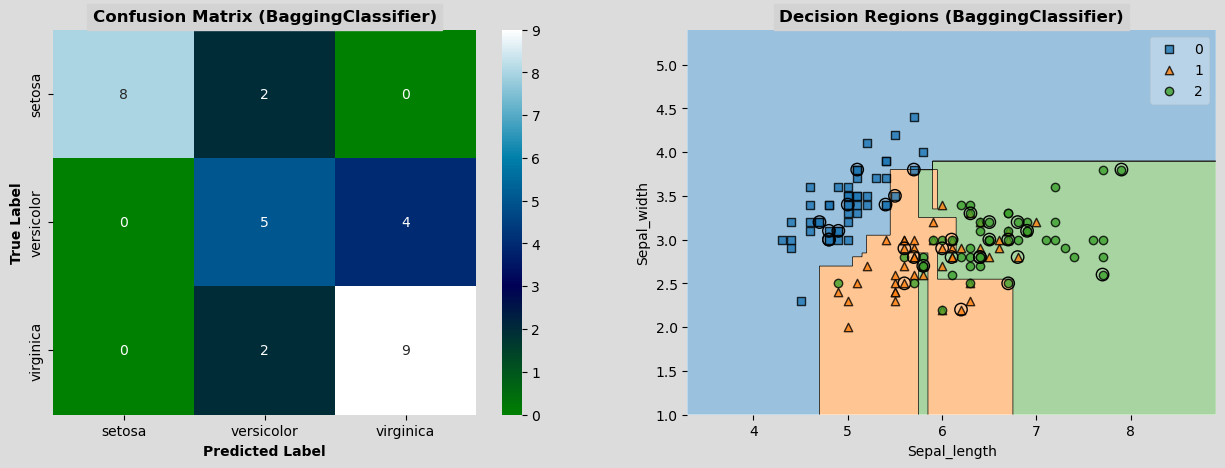

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5), facecolor='gainsboro')
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='ocean', ax=ax1
           )
ax1.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax1.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax1.set_ylabel('True Label', fontsize=10, fontweight='bold')
ax1.set_xlabel('Predicted Label', fontsize=10, fontweight='bold')
ax1.set_title('Confusion Matrix (BaggingClassifier)', fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=clf_bg, 
                      ax=ax2, 
                      X_highlight=X_test.to_numpy(),
                      markers='s^oxv')
ax2.set_xlabel('Sepal_length', fontsize=10)
ax2.set_ylabel('Sepal_width', fontsize=10)
ax2.set_title('Decision Regions (BaggingClassifier)', fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plt.show()

In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.56      0.56      0.56         9
           2       0.82      0.69      0.75        13

    accuracy                           0.73        30
   macro avg       0.72      0.75      0.73        30
weighted avg       0.73      0.73      0.73        30



In [28]:
print(clf_bg.score(X_train, y_train))
print(clf_bg.score(X_test, y_test))
print(accuracy_score(y_test,y_pred))

0.8083333333333333
0.7333333333333333
0.7333333333333333


In [29]:
clf_bg.oob_score_

0.7083333333333334

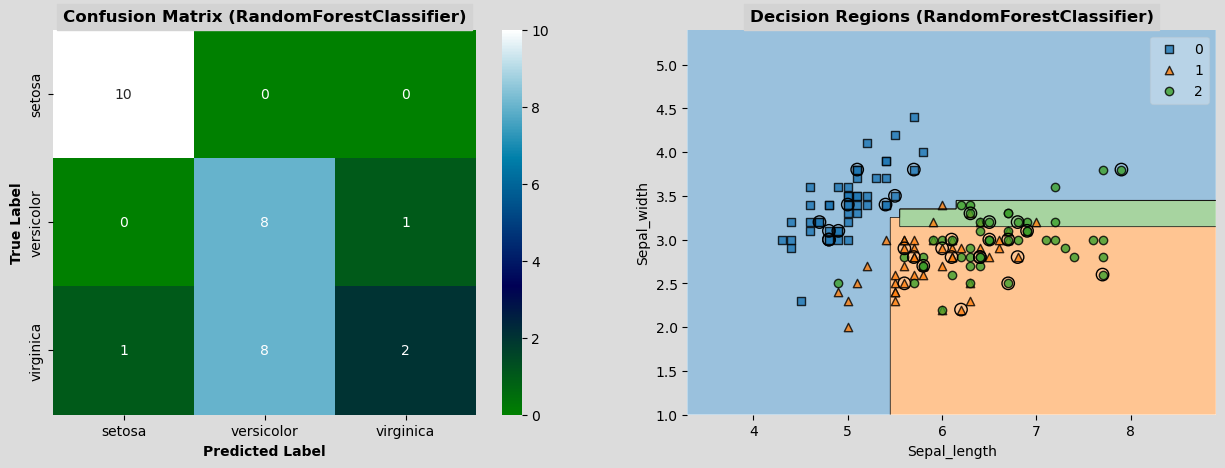

In [30]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=1)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5), facecolor='gainsboro')
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='ocean', ax=ax1
           )
ax1.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax1.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax1.set_ylabel('True Label', fontsize=10, fontweight='bold')
ax1.set_xlabel('Predicted Label', fontsize=10, fontweight='bold')
ax1.set_title('Confusion Matrix (RandomForestClassifier)', fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=clf_rf, 
                      ax=ax2, 
                      X_highlight=X_test.to_numpy(),
                      markers='s^oxv')
ax2.set_xlabel('Sepal_length', fontsize=10)
ax2.set_ylabel('Sepal_width', fontsize=10)
ax2.set_title('Decision Regions (RandomForestClassifier)', fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plt.show()

[Text(0.5666666666666667, 0.9, 'Sepal_length <= 5.45\nlog_loss = 1.585\nsamples = 120\nvalue = [40, 41, 39]\nclass = Versicolor'),
 Text(0.26666666666666666, 0.7, 'Sepal_width <= 2.8\nlog_loss = 0.726\nsamples = 44\nvalue = [37, 6, 1]\nclass = Setosa'),
 Text(0.13333333333333333, 0.5, 'Sepal_length <= 4.7\nlog_loss = 1.149\nsamples = 7\nvalue = [1, 5, 1]\nclass = Versicolor'),
 Text(0.06666666666666667, 0.3, 'log_loss = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Setosa'),
 Text(0.2, 0.3, 'Sepal_length <= 4.95\nlog_loss = 0.65\nsamples = 6\nvalue = [0, 5, 1]\nclass = Versicolor'),
 Text(0.13333333333333333, 0.1, 'log_loss = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = Versicolor'),
 Text(0.26666666666666666, 0.1, 'log_loss = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = Versicolor'),
 Text(0.4, 0.5, 'Sepal_length <= 5.35\nlog_loss = 0.179\nsamples = 37\nvalue = [36, 1, 0]\nclass = Setosa'),
 Text(0.3333333333333333, 0.3, 'log_loss = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = Setosa

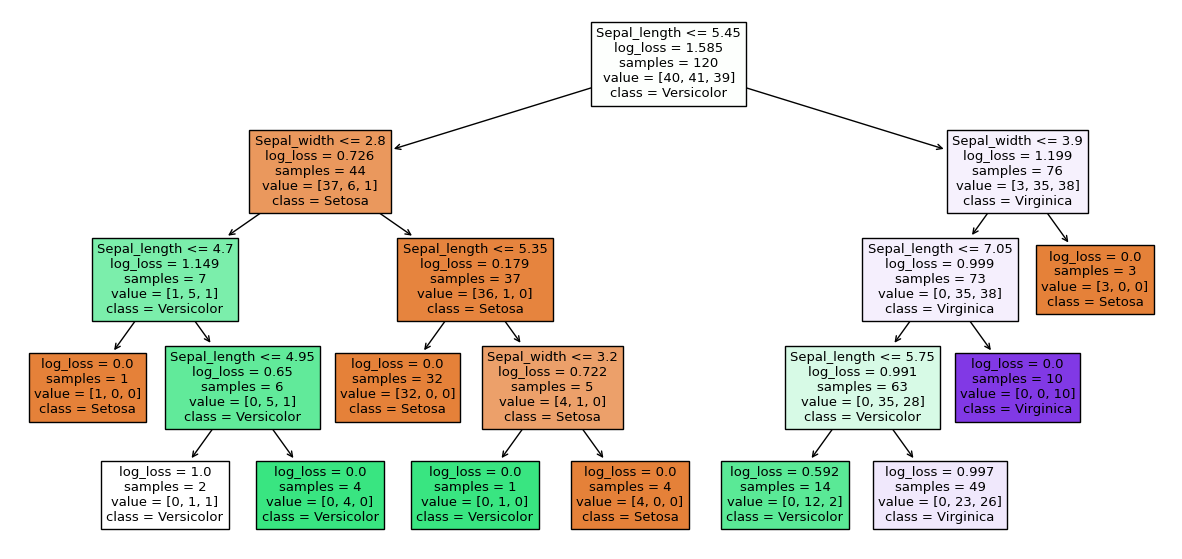

In [31]:
fig, ax1 = plt.subplots(1,1, figsize=(15,7))
tree.plot_tree(clf_dt, max_depth=4, feature_names=['Sepal_length','Sepal_width'], class_names=['Setosa','Versicolor','Virginica'], ax=ax1, filled=True)

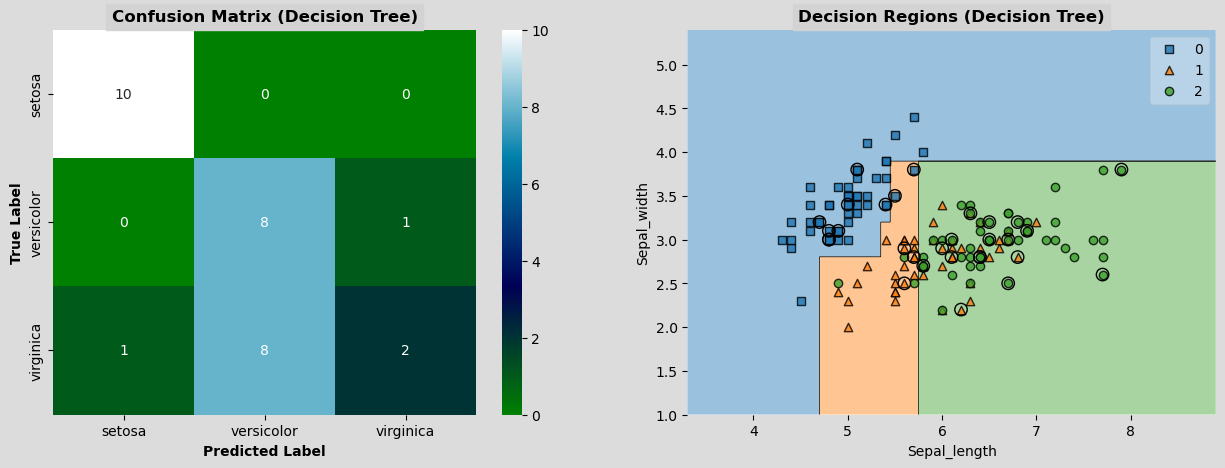

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5), facecolor='gainsboro')
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='ocean', ax=ax1)
ax1.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax1.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax1.set_ylabel('True Label', fontsize=10, fontweight='bold')
ax1.set_xlabel('Predicted Label', fontsize=10, fontweight='bold')
ax1.set_title('Confusion Matrix (Decision Tree)', fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=clf_dt, 
                      ax=ax2, 
                      X_highlight=X_test.to_numpy(),
                      markers='s^oxv')
ax2.set_xlabel('Sepal_length', fontsize=10)
ax2.set_ylabel('Sepal_width', fontsize=10)
ax2.set_title('Decision Regions (Decision Tree)', fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plt.show()

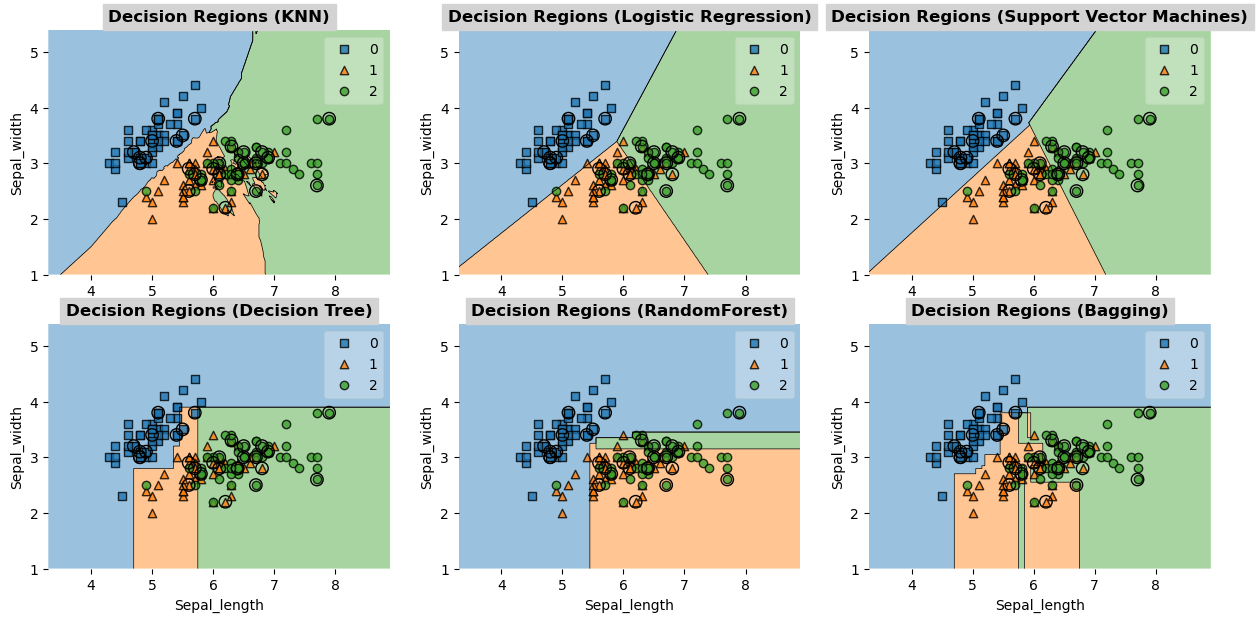

In [33]:
clf_classifiers = [clf_knn, clf_lr, clf_svm, clf_dt, clf_rf, clf_bg]
title = ['KNN', 'Logistic Regression', 'Support Vector Machines', 'Decision Tree','RandomForest', 'Bagging']
plt.figure(figsize=(15,7))

n_rows=2
n_cols=3
pos=1

for i, title in zip(clf_classifiers, title):
    plt.subplot(n_rows, n_cols, pos)
    plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=i, 
                      X_highlight=X_test.to_numpy(),
                      markers='s^oxv')
    plt.xlabel('Sepal_length', fontsize=10)
    plt.ylabel('Sepal_width', fontsize=10)
    plt.title(f'Decision Regions ({title})', fontsize=12, fontweight='bold', backgroundcolor='lightgray')
    pos+=1

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = df.set_index('species')


def preprocessing_standardscaler(X):
    mean = np.mean(X)
    std = np.std(X)
    scaled = X-mean/std
    return scaled
preprocessing_standardscaler(df)

df_scaled = preprocessing_standardscaler(df)

df_scaled =df_scaled.drop('type', axis=1)
pca_loadings = pd.DataFrame(PCA().fit(df_scaled).components_.T, columns = ['V1','V2','V3','V4'], index=df_scaled.columns)
pca_loadings
    

,V1,V2,V3,V4
sepal_length,0.361387,0.656589,-0.582030,-0.315487
sepal_width,-0.084523,0.730161,0.597911,0.319723
petal_length,0.856671,-0.173373,0.076236,0.479839
petal_width,0.358289,-0.075481,0.545831,-0.753657


Text(0, 0.5, 'Principal Component (PC2)')

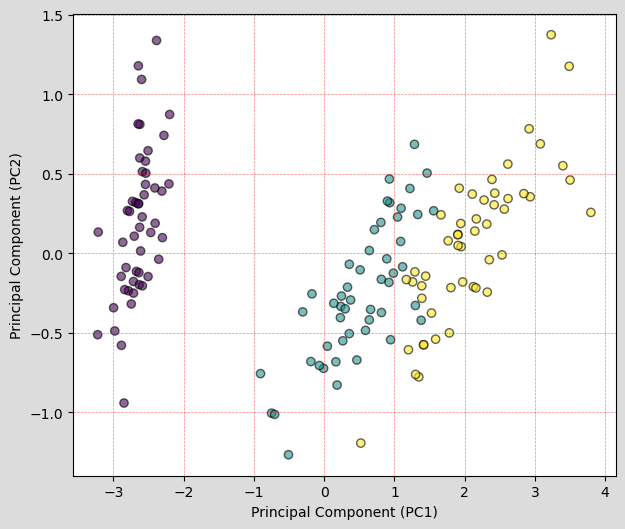

In [35]:
pca = PCA()

df_pca = pd.DataFrame(pca.fit_transform(df_scaled), index=df_scaled.index, columns=['PC1','PC2','PC3','PC4'])

plt.figure(figsize=(7,6), facecolor='gainsboro')
plt.scatter(df_pca.PC1, df_pca.PC2, c=df.type, edgecolors='black', alpha=0.6)
plt.grid(lw=0.5, linestyle='dashed', color='red', alpha=0.5)
plt.xlabel('Principal Component (PC1)')
plt.ylabel('Principal Component (PC2)')



[4.22824171 0.24267075 0.0782095  0.02383509]
[0.92461872 0.05306648 0.01710261 0.00521218]


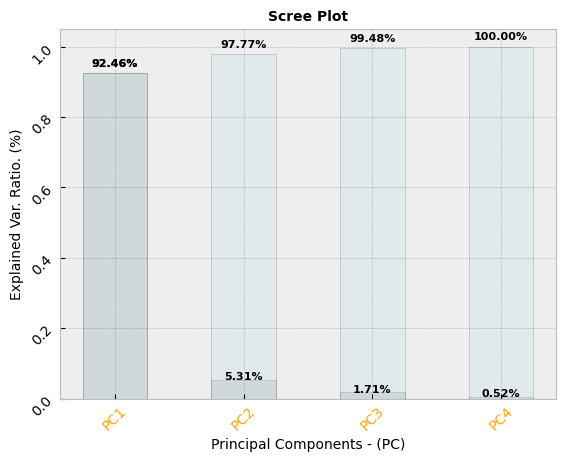

In [36]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

plt.style.use('bmh')
plt.bar(df_pca.columns, pca.explained_variance_ratio_, 
        width=0.5 , 
        color='gray', 
        alpha=0.2, 
        edgecolor='black', label='Explained Var. Ratio')
plt.bar(df_pca.columns, np.cumsum(pca.explained_variance_ratio_), 
        width=0.5, 
        alpha=0.2,
        color='lightblue',  
        edgecolor='black', label='Cumulative Expl. Var. Ratio')
plt.title('Scree Plot', fontsize=10, fontweight='bold')
plt.xlabel('Principal Components - (PC)', fontsize=10)
plt.ylabel('Explained Var. Ratio. (%)', fontsize=10)

for c, y in zip(df_pca.columns, pca.explained_variance_ratio_):
    plt.text(c,y*1.02, f'{y:.2%}', ha='center', fontsize=8, fontweight='bold')

for c, y in zip(df_pca.columns, np.cumsum(pca.explained_variance_ratio_)):
    plt.text(c,y*1.02, f'{y:.2%}', ha='center', fontsize=8, fontweight='bold')
    
plt.xticks(rotation=45, color='orange')
plt.yticks(rotation=45, color='black')
plt.grid(linestyle='--', lw=0.5, alpha=0.2, color='black')

In [37]:
pca_loadings

,V1,V2,V3,V4
sepal_length,0.361387,0.656589,-0.582030,-0.315487
sepal_width,-0.084523,0.730161,0.597911,0.319723
petal_length,0.856671,-0.173373,0.076236,0.479839
petal_width,0.358289,-0.075481,0.545831,-0.753657


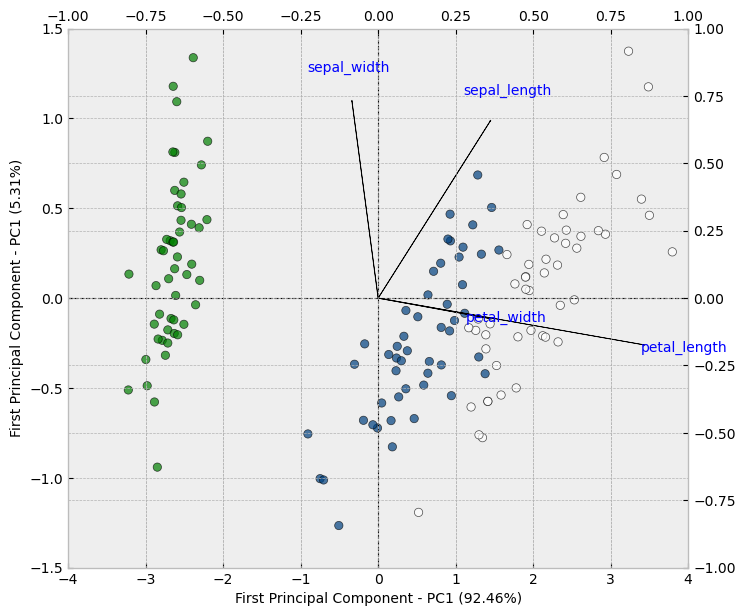

In [39]:
fig, ax1 = plt.subplots(figsize=(8,7))

ax1.scatter(df_pca.PC1, df_pca.PC2, c=df.type, edgecolor='black', cmap='ocean', alpha=.7)

ax1.set_xlim(-4,4)
ax1.set_ylim(-1.5,1.5)

ax1.hlines(0,-4,4, linestyle='dashed', color='black', lw=.8)
ax1.vlines(0,-1.5,1.5,linestyle='dashed', color='black', lw=.8)

ax1.set_xlabel(f'First Principal Component - PC1 ({pca.explained_variance_ratio_[0]:.2%})', fontsize=10)
ax1.set_ylabel(f'First Principal Component - PC1 ({pca.explained_variance_ratio_[1]:.2%})', fontsize=10)

ax2 = ax1.twinx().twiny()

ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)

for i,col, pca_loadings_v1, pca_loadings_v2 in zip(np.arange(0,4),
                                                   pca_loadings.index, 
                                                   pca_loadings['V1'], 
                                                   pca_loadings['V2']):
    
    ax2.annotate(col, xy=(pca_loadings['V1'][i]*1.15,pca_loadings['V2'][i]*1.15), ha='center', color='blue')
    
for i in np.arange(0,4):
    ax2.arrow(0,0,pca_loadings.V1[i], pca_loadings.V2[i], color='black')

In [40]:
X = df_pca[['PC1','PC2']]
y = LabelEncoder().fit_transform(df_pca.index)

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=42)

k = np.arange(1,25)
knn = KNeighborsClassifier(n_neighbors=k)
parameters ={'n_neighbors':k}
searcher = GridSearchCV(estimator=knn, param_grid=parameters, cv=5)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(n_neighbors=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [41]:
searcher.best_params_

{'n_neighbors': 1}

<Axes: >

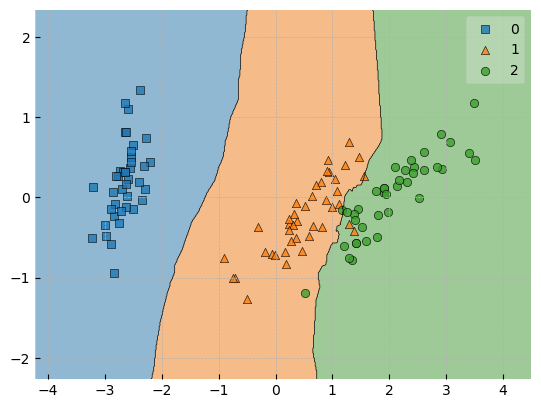

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
plot_decision_regions(X_train.to_numpy(), y_train, clf=knn)

In [43]:
print(accuracy_score(y_train, knn.predict(X_train)))
print(accuracy_score(y_test, knn.predict(X_test)))

0.9666666666666667
1.0
